<a href="https://colab.research.google.com/github/adityaas05/Portofolio/blob/main/Clustering/Customer%20Segmentation%20RevoBank/Customer%20Segmentation%20%26%20Promo%20Sensitivity%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction📄


---


> **RevoBank Overview**

RevoBank is European bank that provides a credit cards to it's customers. Current focus on the card partnership tribe to boost credit usage in collaboration RevoShop.

**Promotion Program**


*   Implemented over the past 6 months in partnership with RevoShop
*   Credit card users receive RevoShop vouchers via email or SMS
*   Redeeming vouchers on eligible transactions earns users 15 reward points (1,5 euros each)
*   No transactions redemption limits, RevoBank covers the entire promotion cost

> **Business Problem**

What is the optimal strategy for the bank to enhance it's understanding of promotion performance and identify methods to cut cost while sustaining or enhancing customer engagement.

> **Business Objective**

1.   Performance Overview :
      -   Evaluate the effectiveness of the promotion program
      -   Analyze from RevoBank's perspective
2.   Customer Segmentation :
      -   Identify distinc segments among RevoBank credit card users who engage with RevoShop
3.   Customization Opportunities :
      -   Explore tailored reward program adjustments for each customer segment
      -   Aim to enhance program effectiveness and reduce promotion costs





# Data Preparation

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # provide a large set of colormaps(cm)
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer # to scalling different attribute
from sklearn.cluster import KMeans # to perform the k-means algorithm
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import cluster # for machine learning and statistical modelling (we use it for clustering)
from sklearn.metrics import silhouette_samples, silhouette_score # for perform silhoutte analysis
from sklearn.datasets import make_blobs # Generate isotropic Gaussian blobs for clustering

## Import Dataset

In [9]:
dataset_url = 'https://docs.google.com/spreadsheets/d/1L213ikLCQfmVKASMLOzExdVR8N-9zlsZxaRIzlPf6dE/edit#gid=1336190230'
dataset_replace = dataset_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(dataset_replace)
bank_dataset = pd.read_csv(dataset_replace)
bank_dataset

https://docs.google.com/spreadsheets/d/1L213ikLCQfmVKASMLOzExdVR8N-9zlsZxaRIzlPf6dE/export?format=csv&gid=1336190230


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5,21,2,...,A,X,0,90587,59785,32,123,1,0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3,22,2,...,A,X,0,65814,32597,34,109,1,0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4,12,2,...,A,X,0,42583,0,1,89,0,0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8,27,6,...,A,X,0,61176,0,0,86,1,1,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5,44,4,...,A,X,0,44525,42253,22,124,1,0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,E,Y,0,27087,35533,33,68,0,0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,E,Y,0,26302,0,27,125,0,1,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,E,Y,1,70105,41249,63,116,1,0,1986-12-29
112632,101059866,5262-MARKETPLACES,REVOSHOP,84.0,64.4,85.0,50.0,5,25,4,...,E,Y,0,24294,0,30,112,0,0,1982-05-14


# Data Cleaning

In [ ]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  int64  
 8   TXN_CNT_LTM            112634 non-null  int64  
 9   PROMO_TXN_CNT_L6M      112634 non-null  int64  
 10  PROMO_TXN_CNT_LTM      112634 non-null  int64  
 11  LAST_TXN_DAY           112634 non-null  int64  
 12  CNT_PROMO_L6M          112634 non-null  int64  
 13  CNT_PROMO_L12M         112634 non-null  int64  
 14  CUST_VALUE_GROUP       112634 non-nu

## Exclude Unnecessary Data

In [ ]:
# Check unique value
for unique in ['MCC','MERCHANT_NAME']:
  print(unique)
  print(bank_dataset[unique].value_counts())
  print('\n')

MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: MERCHANT_NAME, dtype: int64




In [ ]:
df_revoshop = bank_dataset[bank_dataset['MERCHANT_NAME'].isin(['REVOSHOP', 'REVOSH MKTPLC'])]
df_revoshop.to_csv('revoshop_transactions.csv', index=False)
df_revoshop

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5,21,2,...,A,X,0,90587,59785,32,123,1,0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3,22,2,...,A,X,0,65814,32597,34,109,1,0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4,12,2,...,A,X,0,42583,0,1,89,0,0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8,27,6,...,A,X,0,61176,0,0,86,1,1,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5,44,4,...,A,X,0,44525,42253,22,124,1,0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2,12,2,...,E,X,0,47708,0,48,124,0,1,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3,22,1,...,E,Y,0,27087,35533,33,68,0,0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7,28,3,...,E,Y,0,26302,0,27,125,0,1,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3,23,2,...,E,Y,1,70105,41249,63,116,1,0,1986-12-29


In [ ]:
for unique in ['MCC','MERCHANT_NAME']:
  print(unique)
  print(df_revoshop[unique].value_counts())
  print('\n')

MCC
5262-MARKETPLACES    111133
Name: MCC, dtype: int64


MERCHANT_NAME
REVOSHOP         91168
REVOSH MKTPLC    19965
Name: MERCHANT_NAME, dtype: int64




## Remove Missing Value and Duplicates

In [ ]:
# There is no duplicate data found
df_revoshop[df_revoshop.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
# There is no missing value
df_revoshop.isnull().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

In [ ]:
# Handle missing values in AVG_PROMO_TXN_AMT_L6M that indicated by -1 value
# Replace missing value with NULL
df_revoshop.loc[df_revoshop['AVG_PROMO_TXN_AMT_L6M'] == -1, 'AVG_PROMO_TXN_AMT_L6M'] = pd.NA
df_revoshop['AVG_PROMO_TXN_AMT_L6M'].value_counts()

100.0    17425
50.0      6402
150.0     5889
120.0     4048
200.0     3997
         ...  
10.8         1
47.8         1
171.7        1
254.0        1
197.1        1
Name: AVG_PROMO_TXN_AMT_L6M, Length: 593, dtype: int64

In [ ]:
df_revoshop.isnull().sum()

ACCOUNT_ID                  0
MCC                         0
MERCHANT_NAME               0
AVG_TXN_AMT_L6M             0
AVG_TXN_AMT_LTM             0
AVG_PROMO_TXN_AMT_L6M    3475
AVG_PROMO_TXN_AMT_LTM       0
TXN_CNT_L6M                 0
TXN_CNT_LTM                 0
PROMO_TXN_CNT_L6M           0
PROMO_TXN_CNT_LTM           0
LAST_TXN_DAY                0
CNT_PROMO_L6M               0
CNT_PROMO_L12M              0
CUST_VALUE_GROUP            0
MAPP_ACTIVE_GROUP           0
HOMEOWNER_STATUS            0
HOME_VALUE                  0
PROXY_INCOME                0
PCT_INCOME_RETIREMENT       0
MOB                         0
FLAG_FEMALE                 0
PROMO_CHANNEL               0
BIRTH_DATE                  0
dtype: int64

In [ ]:
# Remove NULL value in AVG_PROMO_TXN_AMT_L6M
# Because the amount of data is only about 3.1% of the whole data
df_revoshop = df_revoshop[~(df_revoshop['AVG_PROMO_TXN_AMT_L6M'].isna())]
df_revoshop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             107658 non-null  int64  
 1   MCC                    107658 non-null  object 
 2   MERCHANT_NAME          107658 non-null  object 
 3   AVG_TXN_AMT_L6M        107658 non-null  float64
 4   AVG_TXN_AMT_LTM        107658 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64
 7   TXN_CNT_L6M            107658 non-null  int64  
 8   TXN_CNT_LTM            107658 non-null  int64  
 9   PROMO_TXN_CNT_L6M      107658 non-null  int64  
 10  PROMO_TXN_CNT_LTM      107658 non-null  int64  
 11  LAST_TXN_DAY           107658 non-null  int64  
 12  CNT_PROMO_L6M          107658 non-null  int64  
 13  CNT_PROMO_L12M         107658 non-null  int64  
 14  CUST_VALUE_GROUP       107658 non-nu

## Change Data Type

In [ ]:
revoshop = df_revoshop.copy()
# We need change the 'ACCOUNT_ID' from integer to string to avoid aggregation error on the id
revoshop['ACCOUNT_ID'] = revoshop['ACCOUNT_ID'].astype(str)
# We must change the 'BIRTH_DATE' data type from string to datetime
revoshop['BIRTH_DATE'] = pd.to_datetime(revoshop['BIRTH_DATE'])
revoshop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  object        
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  int64         
 8   TXN_CNT_LTM            107658 non-null  int64         
 9   PROMO_TXN_CNT_L6M      107658 non-null  int64         
 10  PROMO_TXN_CNT_LTM      107658 non-null  int64         
 11  LAST_TXN_DAY           107658 non-null  int64         
 12  CNT_PROMO_L6M          107658 non-null  int6

## Data Manipulation

In [ ]:
# Change the connotations used in some columns to make them easier to understand
revoshop['MAPP_ACTIVE_GROUP'].replace('X', 'High Activity', inplace = True)
revoshop['MAPP_ACTIVE_GROUP'].replace('Y', 'Average Activity', inplace = True)
revoshop['MAPP_ACTIVE_GROUP'].replace('Z', 'Low Activisy', inplace = True)

revoshop['CUST_VALUE_GROUP'].replace('A', 'Excellent', inplace = True)
revoshop['CUST_VALUE_GROUP'].replace('B', 'Good', inplace = True)
revoshop['CUST_VALUE_GROUP'].replace('C', 'Fair', inplace = True)
revoshop['CUST_VALUE_GROUP'].replace('D', 'Poor', inplace = True)
revoshop['CUST_VALUE_GROUP'].replace('E', 'Very Poor', inplace = True)

revoshop['HOMEOWNER_STATUS'].replace(1, 'Homeowner', inplace = True)
revoshop['HOMEOWNER_STATUS'].replace(0, 'Otherwise', inplace = True)

revoshop['PROXY_INCOME'].replace(0, 'Unavailable', inplace = True)

revoshop['PROMO_CHANNEL'].replace(1, 'e-mail', inplace = True)
revoshop['PROMO_CHANNEL'].replace(0, 'SMS', inplace = True)

revoshop['FLAG_FEMALE'].replace(1, 'Female', inplace = True)
revoshop['FLAG_FEMALE'].replace(0, 'Male', inplace = True)
revoshop.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5,21,2,...,Excellent,High Activity,Otherwise,90587,59785,32,123,Female,SMS,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3,22,2,...,Excellent,High Activity,Otherwise,65814,32597,34,109,Female,SMS,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4,12,2,...,Excellent,High Activity,Otherwise,42583,Unavailable,1,89,Male,SMS,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8,27,6,...,Excellent,High Activity,Otherwise,61176,Unavailable,0,86,Female,e-mail,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5,44,4,...,Excellent,High Activity,Otherwise,44525,42253,22,124,Female,SMS,1989-10-21


We replace CUST_VALUE_GROUP to :

A - Excellent:
"Top-tier customer – a reliable and profitable client deserving of credit privileges."

B - Good:
"A commendable customer with a positive track record, demonstrating creditworthiness."

C - Fair:
"A satisfactory customer profile, meeting standard criteria for credit considerations."

D - Poor:
"A customer with a subpar credit history, requiring careful evaluation before extending credit."

E - Very Poor:
"The least favorable customer category, posing high credit risk and demanding cautious handling."

In [ ]:
# Calculate 'BITH_DATE' column to get the customers age
# We assume that today is 31th jan 2023
reference_date = datetime(2023, 1, 31)
revoshop['CUST_AGE'] = (reference_date - revoshop['BIRTH_DATE']).astype('<m8[Y]').astype(int)

# Create customers age group
bins = [16, 26, 36, 46, 56, 66]
labels = ['Youthful', 'Young Professionals', 'Mid-Career', 'Established', 'Experienced']
revoshop['GROUP_AGE'] = pd.cut(revoshop['CUST_AGE'], bins=bins, labels=labels, right=False)
revoshop.head()


,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,CUST_AGE,GROUP_AGE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5,21,2,...,Otherwise,90587,59785,32,123,Female,SMS,1975-12-17,47,Established
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3,22,2,...,Otherwise,65814,32597,34,109,Female,SMS,1991-12-27,31,Young Professionals
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4,12,2,...,Otherwise,42583,Unavailable,1,89,Male,SMS,1970-03-22,52,Established
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8,27,6,...,Otherwise,61176,Unavailable,0,86,Female,e-mail,1983-11-26,39,Mid-Career
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5,44,4,...,Otherwise,44525,42253,22,124,Female,SMS,1989-10-21,33,Young Professionals


* Youthful (17-25):
Energetic individuals in the early stages of adulthood. This group is characterized by a vibrant and youthful spirit, often exploring various aspects of life.

* Young Professionals (26-35):
Individuals building their careers and establishing themselves professionally. This group is focused on career development and working towards their professional goals.

* Mid-Career (36-45):
People in the middle of their careers, balancing work and life. This group has likely achieved stability in their careers and may be navigating the challenges and rewards of the mid-career phase.

* Established (46-55):
Individuals who have reached a stable and established point in their lives. This group has likely achieved success in their careers and may be enjoying the fruits of their efforts.

* Experienced (56-65):
Wise and experienced individuals who have accumulated a wealth of knowledge. This group, while seasoned, continues to bring a wealth of experience to new adventures and challenges.

# EDA📊

## Descriptive Statistic

In [ ]:
# Copy dataset
revoshop_eda = revoshop.copy()

In [ ]:
string_col = ['MCC', 'MERCHANT_NAME', 'CUST_VALUE_GROUP', 'MAPP_ACTIVE_GROUP', 'HOMEOWNER_STATUS',
              'PROXY_INCOME', 'FLAG_FEMALE', 'PROMO_CHANNEL', 'GROUP_AGE']
string_desc = revoshop_eda[string_col].describe()
string_desc

,MCC,MERCHANT_NAME,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,PROXY_INCOME,FLAG_FEMALE,PROMO_CHANNEL,GROUP_AGE
count,107658,107658,107658,107658,107658,107658,107658,107658,107658
unique,1,2,5,3,2,25609,2,2,5
top,5262-MARKETPLACES,REVOSHOP,Very Poor,High Activity,Homeowner,Unavailable,Female,SMS,Mid-Career
freq,107658,88319,44537,100141,56916,26259,63035,75299,66659


* We have 107,658 user
* Most of the customer value is Very Poor. Indicating that they are neither the most profitable nor creditworthy.
* Most of the status account activity in the bank's app is High
* Most homeowner statuses are credit card holders who are also homeowners
* Most of the customer's estimated monthly income is unavailable based on information in the bank.
* Most of the customers' gender is female.
* Most of the users receive communication via SMS.
* Most of age group is Mid-Career which has an age range between 36 to 45 years old

### Percentage of User Activity

In [ ]:
for unique in ['MAPP_ACTIVE_GROUP']:
    print(unique)
    print(revoshop_eda[unique].value_counts(normalize=True) * 100)
    print('\n')

MAPP_ACTIVE_GROUP
High Activity       93.017704
Average Activity     6.535511
Low Activisy         0.446785
Name: MAPP_ACTIVE_GROUP, dtype: float64




### Percentage of Users Gender

In [ ]:
for unique in ['FLAG_FEMALE']:
    print(unique)
    print(revoshop_eda[unique].value_counts(normalize=True) * 100)
    print('\n')

FLAG_FEMALE
Female    58.551153
Male      41.448847
Name: FLAG_FEMALE, dtype: float64




### Percentage Group of Age

In [ ]:
for unique in ['GROUP_AGE']:
    print(unique)
    print(revoshop_eda[unique].value_counts(normalize=True) * 100)
    print('\n')

GROUP_AGE
Mid-Career             61.917368
Young Professionals    21.296141
Established            15.970016
Experienced             0.426350
Youthful                0.390124
Name: GROUP_AGE, dtype: float64




### Percentage of Users Homeowner Status

In [ ]:
for unique in ['HOMEOWNER_STATUS']:
    print(unique)
    print(revoshop_eda[unique].value_counts(normalize=True) * 100)
    print('\n')

HOMEOWNER_STATUS
Homeowner    52.867413
Otherwise    47.132587
Name: HOMEOWNER_STATUS, dtype: float64




### Percentage of Users Receiving through Promo Channel

In [ ]:
for unique in ['PROMO_CHANNEL']:
    print(unique)
    print(revoshop_eda[unique].value_counts(normalize=True) * 100)
    print('\n')

PROMO_CHANNEL
SMS       69.942782
e-mail    30.057218
Name: PROMO_CHANNEL, dtype: float64




### Percentage Group of Customers Value

In [ ]:
for unique in ['CUST_VALUE_GROUP']:
    print(unique)
    print(revoshop_eda[unique].value_counts(normalize=True) * 100)
    print('\n')

CUST_VALUE_GROUP
Very Poor    41.368965
Fair         16.472533
Good         15.787958
Excellent    15.223207
Poor         11.147337
Name: CUST_VALUE_GROUP, dtype: float64




In [ ]:
num_col = ['AVG_TXN_AMT_L6M', 'AVG_TXN_AMT_LTM', 'AVG_PROMO_TXN_AMT_L6M', 'AVG_PROMO_TXN_AMT_LTM', 'TXN_CNT_L6M',
            'TXN_CNT_LTM', 'PROMO_TXN_CNT_L6M', 'PROMO_TXN_CNT_LTM', 'LAST_TXN_DAY', 'CNT_PROMO_L6M', 'CNT_PROMO_L12M',
           'HOME_VALUE','PCT_INCOME_RETIREMENT', 'MOB', 'CUST_AGE']
pd.set_option('display.float_format', lambda x: '%.2f' % x)
num_desc = revoshop_eda[num_col].describe()
num_desc.loc['skewness'] = revoshop_eda[num_col].skew()
num_desc.loc['variance'] = revoshop_eda[num_col].var()
num_desc.loc['kurtosis'] = revoshop_eda[num_col].kurt()
num_desc

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,CNT_PROMO_L12M,HOME_VALUE,PCT_INCOME_RETIREMENT,MOB,CUST_AGE
count,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00,107658.00
mean,126.80,106.82,125.70,119.82,4.52,20.16,2.82,10.37,18.30,5.74,14.38,88424.08,31.01,101.20,39.97
std,79.82,75.28,80.37,76.64,2.31,8.96,1.71,4.40,4.15,1.41,5.98,71656.26,12.05,25.65,5.66
min,11.50,17.30,3.20,3.20,1.00,3.00,1.00,1.00,2.00,0.00,1.00,0.00,0.00,21.00,17.00
25%,83.30,69.30,80.00,80.00,3.00,14.00,1.00,7.00,16.00,5.00,12.00,47297.00,25.00,81.00,36.00
50%,108.00,92.60,104.30,100.00,4.00,18.00,2.00,10.00,18.00,6.00,13.00,66907.00,31.00,105.00,40.00
75%,150.00,123.80,150.00,150.00,6.00,24.00,4.00,12.00,21.00,6.00,14.00,98231.00,38.00,125.00,44.00
max,2000.00,3010.00,2000.00,2500.00,18.00,127.00,10.00,46.00,28.00,21.00,76.00,600050.00,100.00,570.00,65.00
skewness,4.39,10.51,4.13,5.21,0.91,1.87,1.03,1.06,-0.81,1.00,2.21,2.85,-0.25,-0.29,0.12
variance,6371.38,5666.80,6459.73,5873.23,5.34,80.22,2.92,19.36,17.22,1.99,35.80,5134619352.88,145.17,657.81,31.99


## Promo-sensitive

In [ ]:
# Identify lifetime promo-sensitive customers
revoshop_eda['TOTAL_SALES_LTM'] = revoshop_eda['AVG_TXN_AMT_LTM'] * revoshop_eda['TXN_CNT_LTM']
revoshop_eda['TOTAL_PROMO_SALES_LTM'] = revoshop_eda['AVG_PROMO_TXN_AMT_LTM'] * revoshop_eda['PROMO_TXN_CNT_LTM']

# Identify promo-sensitive customers in the last 6 months
revoshop_eda['TOTAL_SALES_L6M'] = revoshop_eda['AVG_TXN_AMT_L6M'] * revoshop_eda['TXN_CNT_L6M']
revoshop_eda['TOTAL_PROMO_SALES_L6M'] = revoshop_eda['AVG_PROMO_TXN_AMT_L6M'] * revoshop_eda['PROMO_TXN_CNT_L6M']
revoshop_eda.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,CUST_AGE,GROUP_AGE,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5,21,2,...,123,Female,SMS,1975-12-17,47,Established,4221.00,1750.00,1080.00,400.00
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3,22,2,...,109,Female,SMS,1991-12-27,31,Young Professionals,2510.20,1500.00,429.90,280.00
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4,12,2,...,89,Male,SMS,1970-03-22,52,Established,2912.40,1160.00,1053.20,800.00
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8,27,6,...,86,Female,e-mail,1983-11-26,39,Mid-Career,5670.00,3900.00,1884.80,1457.40
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5,44,4,...,124,Female,SMS,1989-10-21,33,Young Professionals,3410.00,1890.00,490.00,390.00


## Total Sales in Revoshop (no promo)

In [ ]:
total_sales = revoshop_eda['TOTAL_SALES_L6M'].sum()
print(f'The total sales in revoshop is {total_sales:,.2f} euros')

The total sales in revoshop is 56,639,218.90 euros


## Total Sales in Response to Promo

In [ ]:
promo_sales = revoshop_eda['TOTAL_PROMO_SALES_L6M'].sum()
print(f'Total of sales in response to promo is {promo_sales:,.2f} euros')

Total of sales in response to promo is 35,208,915.90 euros


* RevoShop's total sales in the last 6 months were 56,639,218.90 Euros.
* Total promo sales accounted for 35,208,915.90 Euros in the last 6 months.


## Total Cost of The Promotion

In [ ]:
promo_cost = revoshop_eda['PROMO_TXN_CNT_L6M'].sum() * 1.5
print(f'Total cost of the promotion is {promo_cost:,.2f} euros')

Total cost of the promotion is 456,100.50 euros


## Total Revenue Generated by the Promo

In [ ]:
revoshop_eda['PROMO_REVENUE_L6M'] = revoshop_eda['TOTAL_PROMO_SALES_L6M'] * 0.024

In [ ]:
total_promo_revenue = promo_sales * 0.024
print(f'Total revenue generated by the promo is {total_promo_revenue:,.2f} euros')

Total revenue generated by the promo is 845,013.98 euros


### Total Promotion Cost vs Total Revenue

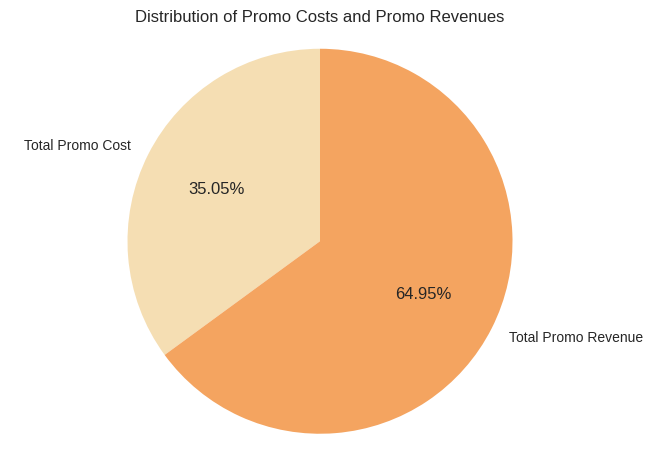

In [ ]:
# Calculate total promotion cost
total_promo_cost_and_revenue = promo_cost + total_promo_revenue

# Calculate percentage of each values
percentage_promo_cost = (promo_cost / total_promo_cost_and_revenue) * 100
percentage_total_promo_revenue = (total_promo_revenue / total_promo_cost_and_revenue) * 100

# Create pie chart
labels = ['Total Promo Cost', 'Total Promo Revenue']
values = [percentage_promo_cost, percentage_total_promo_revenue]

plt.pie(values, labels=labels, autopct=lambda p: '{:.2f}%'.format(p), startangle=90, colors=['wheat', 'sandybrown'])
plt.axis('equal')
plt.title('Distribution of Promo Costs and Promo Revenues')

plt.show()


In [ ]:
# Profit percentage
profit = total_promo_revenue - promo_cost
profit_percentage = (profit/ promo_cost) * 100
print(f'{profit_percentage:.2f}%')

85.27%


* RevoShop's total promo costs in the last 6 months were 456,100.50 Euros.
* RevoShop's total promo revenue in the last 6 months was 845,013.98 Euros.
* From the chart, we can conclude that RevoShop made a profit from promo sales of 388,913.48 Euros, or about 85.27%.

## Number of Promo-Sensitive Customers

### Promo-Sensitive Customers over the lifetime

In [ ]:
revoshop_eda['PROMO_SENSITIVE_LTM'] = revoshop_eda['TOTAL_PROMO_SALES_LTM'] > 0.5 * revoshop_eda['TOTAL_SALES_LTM']
revoshop_eda['PROMO_SENSITIVE_LTM'].value_counts()

True     73461
False    34197
Name: PROMO_SENSITIVE_LTM, dtype: int64

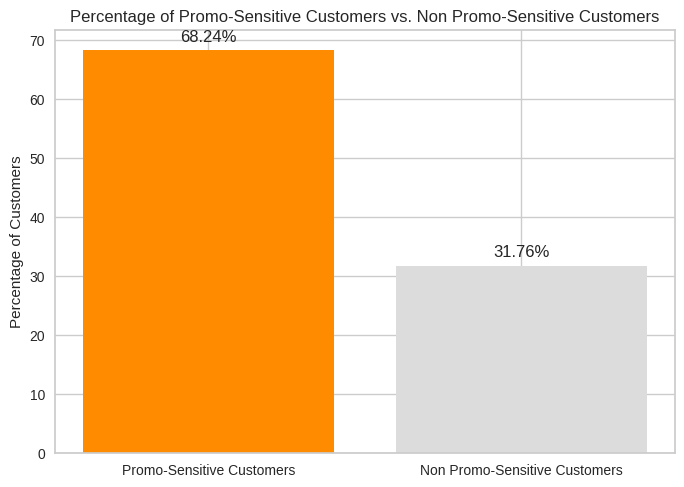

In [ ]:
# Calculate total customers
total_customers = len(revoshop_eda)

# Calculate promo-sensitive customers and non promo-sensitive customers
promo_sensitive_customers = revoshop_eda['PROMO_SENSITIVE_LTM'].sum()
non_promo_sensitive_customers = total_customers - promo_sensitive_customers

# Calculate percantage of each values
percentage_promo_sensitive_customers = (promo_sensitive_customers / total_customers) * 100
percentage_non_promo_sensitive_customers = (non_promo_sensitive_customers / total_customers) * 100

# Create bar chart
labels = ['Promo-Sensitive Customers', 'Non Promo-Sensitive Customers']
values = [percentage_promo_sensitive_customers, percentage_non_promo_sensitive_customers]

plt.bar(labels, values, color=['darkorange', 'gainsboro'])
plt.ylabel('Percentage of Customers')
plt.title('Percentage of Promo-Sensitive Customers vs. Non Promo-Sensitive Customers')

for i, v in enumerate(values):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', va='bottom')

plt.show()

* There are 73,461 customer entries that are considered promo-sensitive over the lifetime, according to the criteria that their promo sales in the last 6 months account for more than 50% of total sales.

* There are 34,197 customer entries that are considered not promo-sensitive over the lifetime, as their promo sales in the last 6 months accounted for less than or equal to 50% of total sales.

### Promo-Sensitive Customers in last 6 months

In [ ]:
revoshop_eda['PROMO_SENSITIVE_L6M'] = revoshop_eda['TOTAL_PROMO_SALES_L6M'] > 0.5 * revoshop_eda['TOTAL_SALES_L6M']
revoshop_eda['PROMO_SENSITIVE_L6M'].value_counts()

True     72091
False    35567
Name: PROMO_SENSITIVE_L6M, dtype: int64

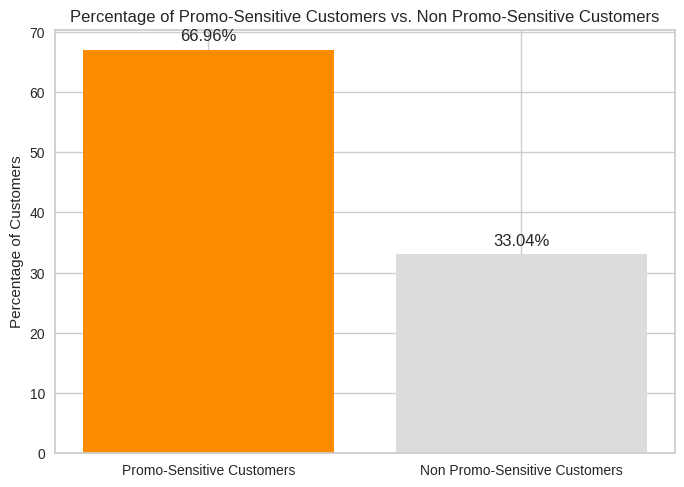

In [ ]:
# Calculate total customers
total_customers = len(revoshop_eda)

# Calculate promo-sensitive customers and non promo-sensitive customers
promo_sensitive_customers = revoshop_eda['PROMO_SENSITIVE_L6M'].sum()
non_promo_sensitive_customers = total_customers - promo_sensitive_customers

# Calculate percantage of each values
percentage_promo_sensitive_customers = (promo_sensitive_customers / total_customers) * 100
percentage_non_promo_sensitive_customers = (non_promo_sensitive_customers / total_customers) * 100

# Create bar chart
labels = ['Promo-Sensitive Customers', 'Non Promo-Sensitive Customers']
values = [percentage_promo_sensitive_customers, percentage_non_promo_sensitive_customers]

plt.bar(labels, values, color=['darkorange', 'gainsboro'])
plt.ylabel('Percentage of Customers')
plt.title('Percentage of Promo-Sensitive Customers vs. Non Promo-Sensitive Customers')

for i, v in enumerate(values):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', va='bottom')

plt.show()


* There are 72,091 customer entries that are considered promo-sensitive in the last 6 months, according to the criteria that their promo sales in the last 6 months account for more than 50% of total sales.

* There are 35,567 customer entries that are considered not promo-sensitive in the last 6 months, as their promo sales in the last 6 months accounted for less than or equal to 50% of total sales.

# Trend

## The difference in transaction behavior and promo-sensitivity.

In [ ]:
revoshop_trend = revoshop_eda.copy()

In [ ]:
revoshop_trend['NORMALIZED_TRX_LTM'] = 6 * revoshop_trend['TXN_CNT_LTM'] / revoshop_trend['MOB']

In [ ]:
# Overall
revoshop_trend.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID' : ['count'],
    'PROMO_SENSITIVE_LTM' : ['sum'],
    'PROMO_SENSITIVE_L6M' : ['sum'],
    'AVG_TXN_AMT_L6M' : ['mean'],
    'AVG_TXN_AMT_LTM' : ['mean'],
    'TXN_CNT_L6M' : ['mean'],
    'TXN_CNT_LTM' : ['mean'],
    'NORMALIZED_TRX_LTM' : ['mean']
})

,ACCOUNT_ID,PROMO_SENSITIVE_LTM,PROMO_SENSITIVE_L6M,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,NORMALIZED_TRX_LTM
,count,sum,sum,mean,mean,mean,mean,mean
MAPP_ACTIVE_GROUP,,,,,,,,
Average Activity,7036,4911,4724,128.04,109.20,4.25,19.71,1.22
High Activity,100141,68384,67097,126.65,106.32,4.54,20.20,1.23
Low Activisy,481,166,270,139.57,176.91,5.20,18.45,1.20


In [ ]:
revoshop_trend['NORMALIZED_TRX_PROMO_LTM'] = 6 * revoshop_trend['PROMO_TXN_CNT_LTM'] / revoshop_trend['MOB']

In [ ]:
# L6M
revoshop_trend.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID' : ['count'],
    'PROMO_SENSITIVE_LTM' : ['sum'],
    'PROMO_SENSITIVE_L6M' : ['sum'],
    'AVG_PROMO_TXN_AMT_L6M' : ['mean'],
    'AVG_PROMO_TXN_AMT_LTM' : ['mean'],
    'PROMO_TXN_CNT_L6M' : ['mean'],
    'PROMO_TXN_CNT_LTM' : ['mean'],
    'NORMALIZED_TRX_PROMO_LTM' : ['mean']
})

,ACCOUNT_ID,PROMO_SENSITIVE_LTM,PROMO_SENSITIVE_L6M,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,NORMALIZED_TRX_PROMO_LTM
,count,sum,sum,mean,mean,mean,mean,mean
MAPP_ACTIVE_GROUP,,,,,,,,
Average Activity,7036,4911,4724,126.62,119.93,2.69,10.47,0.65
High Activity,100141,68384,67097,125.61,119.71,2.83,10.37,0.63
Low Activisy,481,166,270,130.18,141.91,2.89,9.12,0.60


*   Customer Count Comparison as Percentage :
    - The percentage of active customers is about 99.55%, while inactive customers are only about 0.45%.
    - The majority of customers have high or average activity in using RevoBank credit cards.
*   Promo-Sensitive Customer Count Comparison :
    - The number of active customers who are responsive to the promo is about 107,117, while the number of inactive customers who are responsive is only about 481.
    - Active customers are more responsive to promotions compared to inactive customers. This suggests that promotions may be more effective at increasing the transaction activity of active customers.
*   Average Transaction Amount Comparison :
    - The average transaction amount per active customer is around 126.74, while inactive customers have an average of around 139.57.
    - Inactive customers have a higher average transaction, this may be because inactive customers have shopping patterns that tend to make large transactions at a certain time, but then do not shop for some time. This can create a higher average transaction.
*   Average Transaction Count Comparison :
    - The average transaction count per active customer is around 4.52, while inactive customers have an average of around 5.20.
    - Inactive customers have more transactions on average compared to active customers. This is probably because inactive customers respond better to promotions or special offers targeted at them. Most likely, the promotion has caught their attention and encouraged them to make more transactions.



## Relationship between increasing the number of email and SMS messages and improved sales performance

In [ ]:
# First, let's check the frequency of CNT_PROMO_L6M
# Seems like majority have 4-7 SMS/Email in the past 6 months; around once a month
revoshop_trend['CNT_PROMO_L6M'].value_counts().sort_index()

0        56
1       306
2      1223
3      2932
4     10458
5     25484
6     47795
7     13555
8      2209
9      1124
10      942
11     1111
12      337
13       56
14        7
15        4
16       26
17       14
18        5
19        5
20        6
21        3
Name: CNT_PROMO_L6M, dtype: int64

In [ ]:
# Does grouping by promo channel matters?
# Does not, it seems
revoshop_trend[['PROMO_CHANNEL','CNT_PROMO_L6M']].groupby('PROMO_CHANNEL').value_counts().sort_index()

PROMO_CHANNEL  CNT_PROMO_L6M
SMS            0                   33
               1                  205
               2                  857
               3                 2006
               4                 7296
               5                17942
               6                33348
               7                 9584
               8                 1524
               9                  773
               10                 649
               11                 768
               12                 226
               13                  39
               14                   2
               15                   2
               16                  18
               17                  11
               18                   5
               19                   4
               20                   5
               21                   2
e-mail         0                   23
               1                  101
               2                  366
               3     

In [ ]:
# It seems like the more SMS/Email sent, the more sales per customer we got!
revoshop_trend.groupby(['CNT_PROMO_L6M']).agg({
    'ACCOUNT_ID' : ['count'],
    'TOTAL_SALES_L6M' : ['mean'],
    'TOTAL_PROMO_SALES_L6M' : ['mean']
})

,ACCOUNT_ID,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M
,count,mean,mean
CNT_PROMO_L6M,,,
0,56,271.86,133.93
1,306,381.36,241.68
2,1223,318.51,211.24
3,2932,321.24,196.06
4,10458,362.94,222.07
5,25484,425.78,263.67
6,47795,570.85,348.94
7,13555,679.29,450.26


<ipython-input-43-af02dae5de07>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revoshop_trend.groupby(['CNT_PROMO_L6M']).mean()[['TOTAL_SALES_L6M','TOTAL_PROMO_SALES_L6M']].plot(kind='line')


<Axes: xlabel='CNT_PROMO_L6M'>

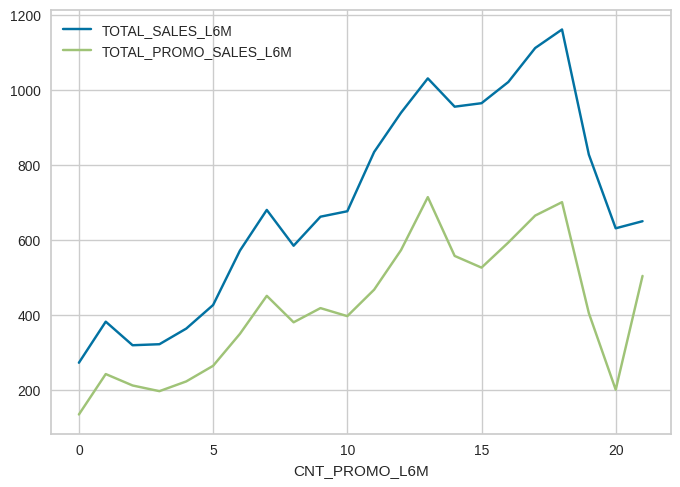

In [ ]:
# It seems like the more SMS/Email sent, the more sales we got!
# But there are zones of "local peaks": 2x, 7x, and 13x communication (roughly)
revoshop_trend.groupby(['CNT_PROMO_L6M']).mean()[['TOTAL_SALES_L6M','TOTAL_PROMO_SALES_L6M']].plot(kind='line')

* Sales promotions play a positive role in increasing total sales.
* Sales promos attract new customers and encourage existing customers to make more purchases.
* Develop more effective marketing strategies to target customers who receive sales promos. This is important because customers who receive sales promos have the potential to increase sales in the future.



# Customer Segmentation👨🏻‍👩🏼‍👧🏾‍👦🏽

## K-Means Method

### Creating New Variables

**Disclaimer! We only focus on data that running after the promotion for 6 months **

Let's create a new variable using K-Means clustering based on RFM :
* Recency (R): Time since the customer made the last transaction.
* Frequency (F): Number of transactions by customers.
* Monetary (M): Total value of transactions by customers.

In [ ]:
# Select columns for clustering
kmeans = revoshop_trend[['ACCOUNT_ID', 'LAST_TXN_DAY', 'PROMO_TXN_CNT_L6M', 'TOTAL_PROMO_SALES_L6M']].copy()
kmeans

,ACCOUNT_ID,LAST_TXN_DAY,PROMO_TXN_CNT_L6M,TOTAL_PROMO_SALES_L6M
0,100000004,15,2,400.00
1,100000008,20,2,280.00
2,100000012,16,2,800.00
3,100000014,20,6,1457.40
4,100000015,25,4,390.00
...,...,...,...,...
112628,101059832,4,2,200.00
112629,101059843,8,1,120.00
112630,101059857,19,3,140.10
112631,101059860,16,2,380.00


In [ ]:
kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107658 entries, 0 to 112632
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             107658 non-null  object 
 1   LAST_TXN_DAY           107658 non-null  int64  
 2   PROMO_TXN_CNT_L6M      107658 non-null  int64  
 3   TOTAL_PROMO_SALES_L6M  107658 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ MB


### Pairplot

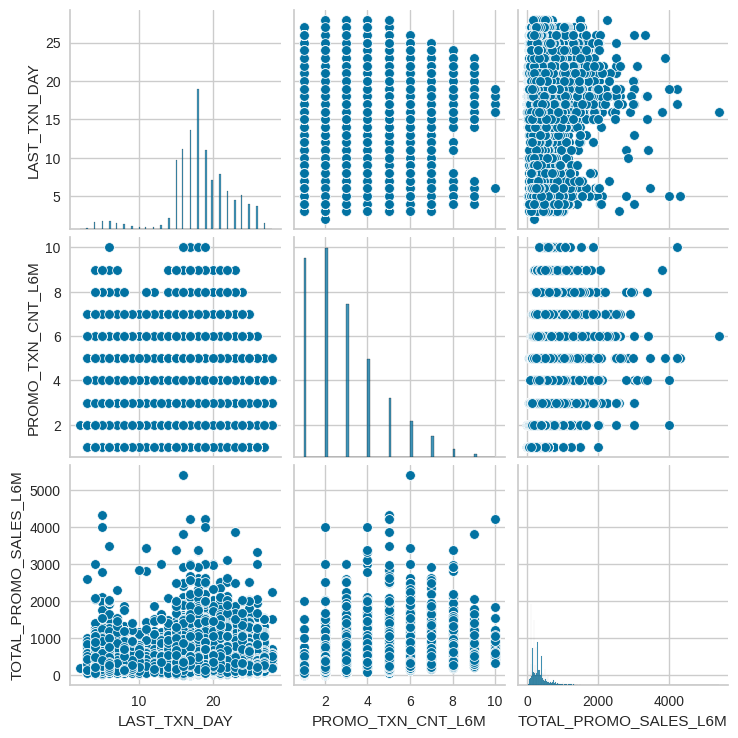

In [ ]:
# Viewing data distribution using pairplot
sns.pairplot(kmeans)

### Feature Scaling

#### Power Transformer

In [ ]:
kmeans.head()

,ACCOUNT_ID,LAST_TXN_DAY,PROMO_TXN_CNT_L6M,TOTAL_PROMO_SALES_L6M
0,100000004,15,2,400.00
1,100000008,20,2,280.00
2,100000012,16,2,800.00
3,100000014,20,6,1457.40
4,100000015,25,4,390.00


In [ ]:
# Define Power Transformer Scale dataset
df_pt = kmeans.copy()
column = kmeans.columns.to_list()
# using Power Transformer Scaler
pt_scaler = PowerTransformer()
df_pt[['LAST_TXN_DAY', 'PROMO_TXN_CNT_L6M', 'TOTAL_PROMO_SALES_L6M']] = pt_scaler.fit_transform(df_pt[['LAST_TXN_DAY', 'PROMO_TXN_CNT_L6M', 'TOTAL_PROMO_SALES_L6M']])
df_pt.head()

,ACCOUNT_ID,LAST_TXN_DAY,PROMO_TXN_CNT_L6M,TOTAL_PROMO_SALES_L6M
0,100000004,-0.88,-0.30,0.64
1,100000008,0.36,-0.30,0.13
2,100000012,-0.65,-0.30,1.63
3,100000014,0.36,1.55,2.50
4,100000015,1.85,0.87,0.60


### Determining Number of Cluster

#### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

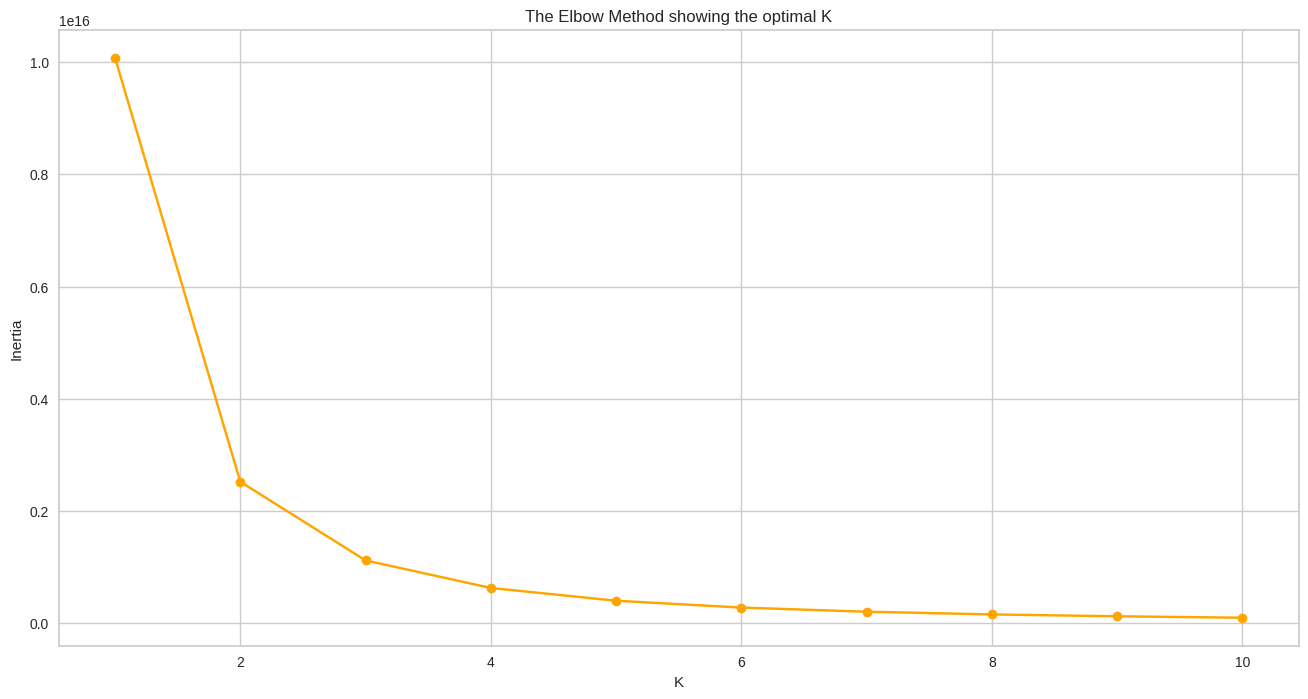

[1.0076738974222996e+16, 2522165578610532.5, 1120720660739480.0, 629352360398854.0, 401985203653994.1, 279657569641369.97, 205948239072236.12, 157689290959884.5, 124598711361506.22, 98894087786883.44]


In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(df_pt)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-', color='orange')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()
print(distortions)

#### Silhouette Method

For k=2, the average silhouette score is 0.6264753963547626, with q = 1 and mod = 0
For k=3, the average silhouette score is 0.5901577628994177, with q = 1 and mod = 1
For k=4, the average silhouette score is 0.5726044676033962, with q = 2 and mod = 0
For k=5, the average silhouette score is 0.5624020643183736, with q = 2 and mod = 1


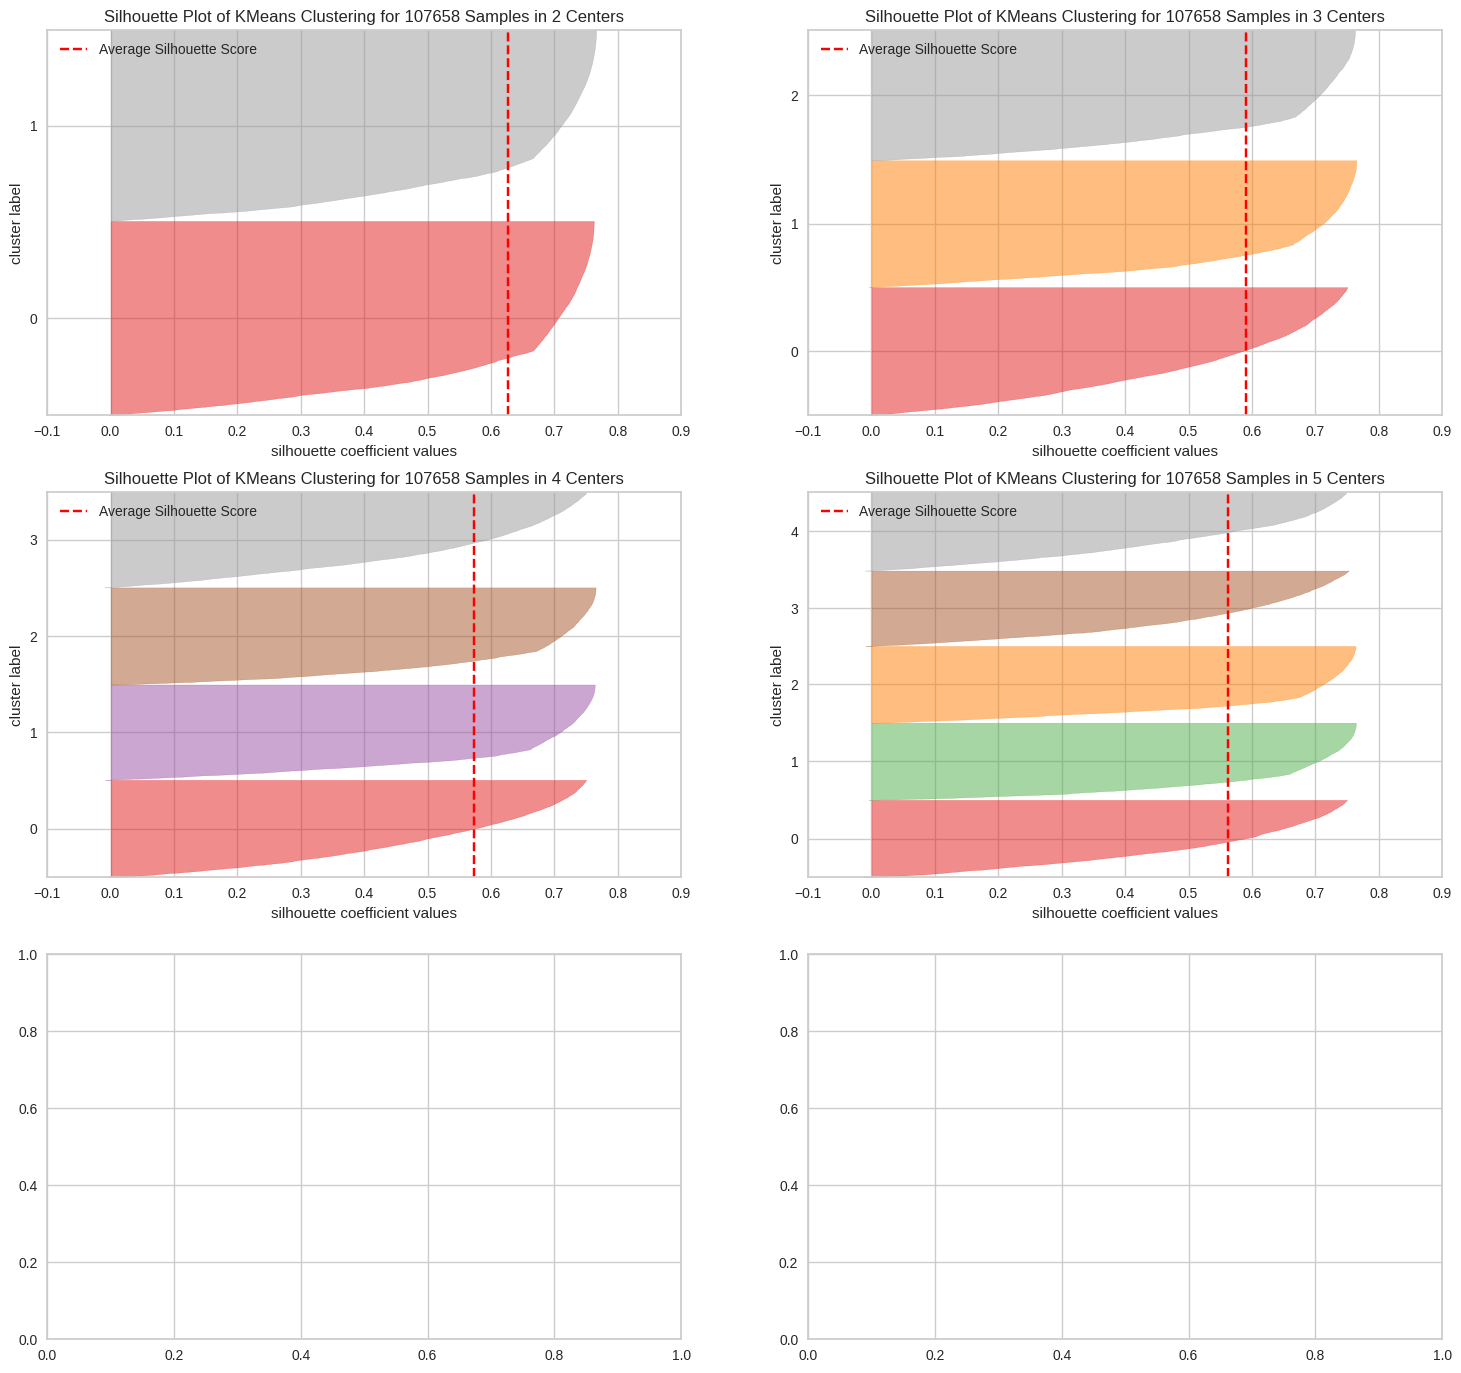

In [ ]:
# Silhouette score plot
# Menurut siluet skor, harusnya kita pilih k=2
# No silhouette negative coefficient values
K = range(2,6)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (18,17))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  kmeanModel.fit(df_pt.values)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = True, ax = ax[q-1][mod])
  sil.fit(df_pt.values)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}, with q = {q} and mod = {mod}")

### Segmentation

In [ ]:
# Create cluster
Cluster_4 = df_pt.copy()

cluster_model = KMeans(n_clusters=4, random_state = 88)
cluster_model.fit(Cluster_4[['LAST_TXN_DAY', 'PROMO_TXN_CNT_L6M', 'TOTAL_PROMO_SALES_L6M']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ACCOUNT_ID,LAST_TXN_DAY,PROMO_TXN_CNT_L6M,TOTAL_PROMO_SALES_L6M,cluster
0,100000004,-0.88,-0.30,0.64,3
1,100000008,0.36,-0.30,0.13,3
2,100000012,-0.65,-0.30,1.63,3
3,100000014,0.36,1.55,2.50,2
4,100000015,1.85,0.87,0.60,1


<Axes: xlabel='cluster', ylabel='LAST_TXN_DAY'>

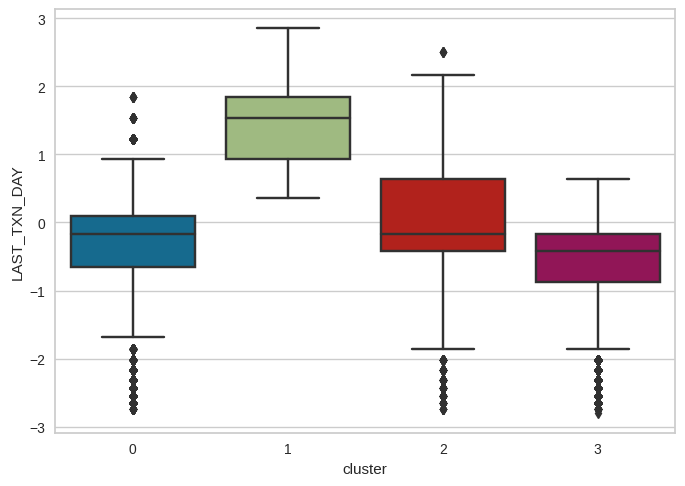

In [ ]:
# Customers Last Transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='LAST_TXN_DAY')

<Axes: xlabel='cluster', ylabel='PROMO_TXN_CNT_L6M'>

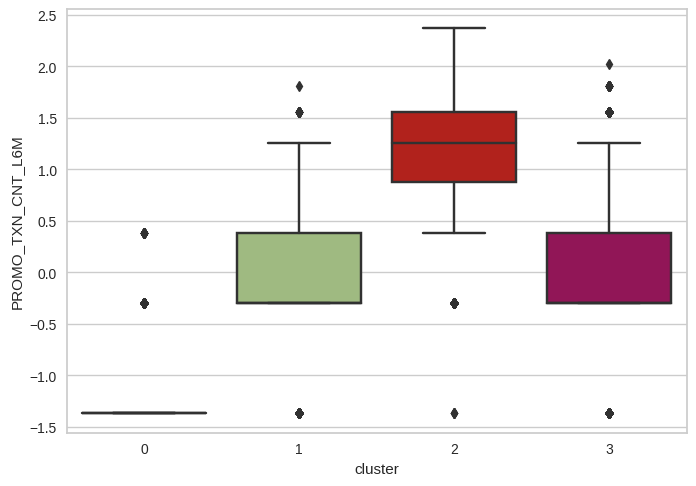

In [ ]:
# Number of Transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='PROMO_TXN_CNT_L6M')

<Axes: xlabel='cluster', ylabel='TOTAL_PROMO_SALES_L6M'>

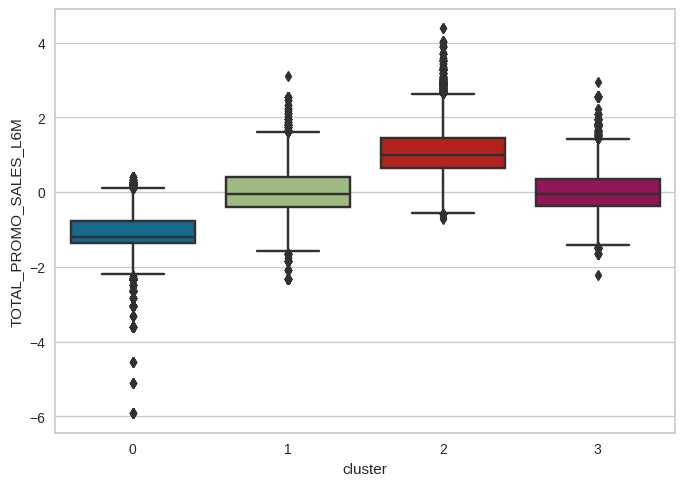

In [ ]:
# Total Sales
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='TOTAL_PROMO_SALES_L6M')

#### Merge with Dataset

In [ ]:
df_segmented = Cluster_4.merge(revoshop_trend,how= 'inner', on = 'ACCOUNT_ID')
df_segmented

,ACCOUNT_ID,LAST_TXN_DAY_x,PROMO_TXN_CNT_L6M_x,TOTAL_PROMO_SALES_L6M_x,cluster,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,...,CUST_AGE,GROUP_AGE,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M_y,PROMO_REVENUE_L6M,PROMO_SENSITIVE_LTM,PROMO_SENSITIVE_L6M,NORMALIZED_TRX_LTM
0,100000004,-0.88,-0.30,0.64,3,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,...,47,Established,4221.00,1750.00,1080.00,400.00,9.60,False,False,1.02
1,100000008,0.36,-0.30,0.13,3,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,...,31,Young Professionals,2510.20,1500.00,429.90,280.00,6.72,True,True,1.21
2,100000012,-0.65,-0.30,1.63,3,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,...,52,Established,2912.40,1160.00,1053.20,800.00,19.20,False,True,0.81
3,100000014,0.36,1.55,2.50,2,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,...,39,Mid-Career,5670.00,3900.00,1884.80,1457.40,34.98,True,True,1.88
4,100000015,1.85,0.87,0.60,1,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,...,33,Young Professionals,3410.00,1890.00,490.00,390.00,9.36,True,True,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,-2.65,-0.30,-0.36,3,5262-MARKETPLACES,REVOSHOP,100.00,84.20,100.00,...,43,Mid-Career,1010.40,500.00,200.00,200.00,4.80,False,True,0.58
107654,101059843,-2.17,-1.37,-1.09,0,5262-MARKETPLACES,REVOSHOP,120.00,113.40,120.00,...,29,Young Professionals,2494.80,1000.00,360.00,120.00,2.88,False,False,1.94
107655,101059857,0.09,0.38,-0.87,3,5262-MARKETPLACES,REVOSHOP,52.90,36.80,46.70,...,42,Mid-Career,1030.40,840.00,370.30,140.10,3.36,True,False,1.34
107656,101059860,-0.65,-0.30,0.56,3,5262-MARKETPLACES,REVOSHOP,195.00,147.30,190.00,...,36,Mid-Career,3387.90,2000.00,585.00,380.00,9.12,True,True,1.19


#### Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['LAST_TXN_DAY_y', 'PROMO_TXN_CNT_L6M_y', 'TOTAL_PROMO_SALES_L6M_y']].agg(['count','mean','min','max','median']).T

cluster                               0        1        2        3
LAST_TXN_DAY_y          count  25825.00 18433.00 28723.00 34677.00
                        mean      16.82    23.81    18.73    16.12
                        min        3.00    20.00     3.00     2.00
                        max       25.00    28.00    27.00    21.00
                        median    18.00    24.00    18.00    17.00
PROMO_TXN_CNT_L6M_y     count  25825.00 18433.00 28723.00 34677.00
                        mean       1.14     2.26     4.89     2.67
                        min        1.00     1.00     1.00     1.00
                        max        3.00     7.00    10.00     8.00
                        median     1.00     2.00     5.00     2.00
TOTAL_PROMO_SALES_L6M_y count  25825.00 18433.00 28723.00 34677.00
                        mean     125.47   277.48   596.79   280.08
                        min        3.20    50.00   156.00    54.00
                        max      340.00  2250.00  5400.00  2000.00
                        median   110.00   250.00   510.30   250.00

### Cluster Interpretation

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,ACCOUNT_ID,LAST_TXN_DAY_x,PROMO_TXN_CNT_L6M_x,TOTAL_PROMO_SALES_L6M_x,cluster,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M_y,PROMO_TXN_CNT_LTM,LAST_TXN_DAY_y,CNT_PROMO_L6M,CNT_PROMO_L12M,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,CUST_AGE,GROUP_AGE,TOTAL_SALES_LTM,TOTAL_PROMO_SALES_LTM,TOTAL_SALES_L6M,TOTAL_PROMO_SALES_L6M_y,PROMO_REVENUE_L6M,PROMO_SENSITIVE_LTM,PROMO_SENSITIVE_L6M,NORMALIZED_TRX_LTM
0,100000004,-0.88,-0.30,0.64,3,5262-MARKETPLACES,REVOSH MKTPLC,216.00,201.00,200.00,250.00,5,21,2,7,15,9,19,Excellent,High Activity,Otherwise,90587,59785,32,123,Female,SMS,1975-12-17,47,Established,4221.00,1750.00,1080.00,400.00,9.60,False,False,1.02
1,100000008,0.36,-0.30,0.13,3,5262-MARKETPLACES,REVOSH MKTPLC,143.30,114.10,140.00,150.00,3,22,2,10,20,8,13,Excellent,High Activity,Otherwise,65814,32597,34,109,Female,SMS,1991-12-27,31,Young Professionals,2510.20,1500.00,429.90,280.00,6.72,True,True,1.21
2,100000012,-0.65,-0.30,1.63,3,5262-MARKETPLACES,REVOSH MKTPLC,263.30,242.70,400.00,290.00,4,12,2,4,16,12,27,Excellent,High Activity,Otherwise,42583,Unavailable,1,89,Male,SMS,1970-03-22,52,Established,2912.40,1160.00,1053.20,800.00,19.20,False,True,0.81
3,100000014,0.36,1.55,2.50,2,5262-MARKETPLACES,REVOSH MKTPLC,235.60,210.00,242.90,300.00,8,27,6,13,20,9,18,Excellent,High Activity,Otherwise,61176,Unavailable,0,86,Female,e-mail,1983-11-26,39,Mid-Career,5670.00,3900.00,1884.80,1457.40,34.98,True,True,1.88
4,100000015,1.85,0.87,0.60,1,5262-MARKETPLACES,REVOSH MKTPLC,98.00,77.50,97.50,90.00,5,44,4,21,25,8,18,Excellent,High Activity,Otherwise,44525,42253,22,124,Female,SMS,1989-10-21,33,Young Professionals,3410.00,1890.00,490.00,390.00,9.36,True,True,2.13


Things can be analyzed :
* Last transaction day
* Promo transaction count
* Total promo sales
* Promo sensitive customers
* MOB
* Revenue
* Group age
* Mapp active group
* Customer value group


#### Last Transaction Day

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['LAST_TXN_DAY_y'].mean()

,cluster,LAST_TXN_DAY_y
0,0,16.82
1,1,23.81
2,2,18.73
3,3,16.12


**Insight**
* 0 = last transaction day = 17
* 1 = last transaction day = 24 (Lowest)
* 2 = last transaction day = 19
* 3 = last transaction day = 16 (Highest)

#### Promo Transaction Count

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PROMO_TXN_CNT_L6M_y'].mean()

,cluster,PROMO_TXN_CNT_L6M_y
0,0,1.14
1,1,2.26
2,2,4.89
3,3,2.67


**Insight**
* 0 = promo transaction count = 1 (Lowest)
* 1 = promo transaction count = 2
* 2 = promo transaction count = 5 (Highest)
* 3 = promo transaction count = 3

#### Total Promo Sales

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['TOTAL_PROMO_SALES_L6M_y'].mean()

,cluster,TOTAL_PROMO_SALES_L6M_y
0,0,125.47
1,1,277.48
2,2,596.79
3,3,280.08


**Insight**
* 0 = total promo sales = 125.47 (Lowest)
* 1 = total promo sales = 277.48
* 2 = total promo sales = 596.79 (Highest)
* 3 = total promo sales = 280.08

#### Promo-Sensitive Customer

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PROMO_SENSITIVE_L6M'].count()

,cluster,PROMO_SENSITIVE_L6M
0,0,25825
1,1,18433
2,2,28723
3,3,34677


**Insight**
* 0 = promo-sensitive customer = 25,825
* 1 = promo-sensitive customer = 18,433 (Lowest)
* 2 = promo-sensitive customer = 28,723
* 3 = promo-sensitive customer = 34,677 (Highest)

#### Promo Revenue

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['PROMO_REVENUE_L6M'].mean()

,cluster,PROMO_REVENUE_L6M
0,0,3.01
1,1,6.66
2,2,14.32
3,3,6.72


**Insight**
* 0 = promo revenue = 3,01 (Highest)
* 1 = promo revenue = 6,66
* 2 = promo revenue = 14,32 (Lowest)
* 3 = promo revenue = 6,72

#### MOB

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['MOB'].mean()

,cluster,MOB
0,0,106.62
1,1,104.18
2,2,93.62
3,3,101.88


**Insight**
* 0 = mob = 107 (Highest)
* 1 = mob = 104
* 2 = mob = 94 (Lowest)
* 3 = mob = 102

#### Age Group

In [ ]:
total_counts = df_segmented.groupby(['cluster', 'GROUP_AGE'], as_index=False)['ACCOUNT_ID'].count()
total_cluster_counts = total_counts.groupby('cluster', as_index=False)['ACCOUNT_ID'].transform('sum')

# Calculate the percentage
total_counts['Percentage'] = (total_counts['ACCOUNT_ID'] / total_cluster_counts['ACCOUNT_ID']) * 100
print(total_counts)

    cluster            GROUP_AGE  ACCOUNT_ID  Percentage
0         0             Youthful          96        0.37
1         0  Young Professionals        5528       21.41
2         0           Mid-Career       16037       62.10
3         0          Established        4065       15.74
4         0          Experienced          99        0.38
5         1             Youthful          72        0.39
6         1  Young Professionals        3911       21.22
7         1           Mid-Career       11488       62.32
8         1          Established        2886       15.66
9         1          Experienced          76        0.41
10        2             Youthful         114        0.40
11        2  Young Professionals        6154       21.43
12        2           Mid-Career       17638       61.41
13        2          Established        4695       16.35
14        2          Experienced         122        0.42
15        3             Youthful         138        0.40
16        3  Young Professional

**Insight**
* 0 = age group = mid-career 62.10%
* 1 = age group = mid-career 62.32%
* 2 = age group = mid-career 61.41%
* 3 = age group = mid-career 61.99%



#### Customer Value Group

In [ ]:
total_counts = df_segmented.groupby(['cluster', 'CUST_VALUE_GROUP'], as_index=False)['ACCOUNT_ID'].count()
total_cluster_counts = total_counts.groupby('cluster', as_index=False)['ACCOUNT_ID'].transform('sum')

# Calculate the percentage
total_counts['Percentage'] = (total_counts['ACCOUNT_ID'] / total_cluster_counts['ACCOUNT_ID']) * 100
print(total_counts)

    cluster CUST_VALUE_GROUP  ACCOUNT_ID  Percentage
0         0        Excellent        3942       15.26
1         0             Fair        4197       16.25
2         0             Good        4176       16.17
3         0             Poor        2808       10.87
4         0        Very Poor       10702       41.44
5         1        Excellent        2754       14.94
6         1             Fair        3153       17.11
7         1             Good        3124       16.95
8         1             Poor        2142       11.62
9         1        Very Poor        7260       39.39
10        2        Excellent        4348       15.14
11        2             Fair        4781       16.65
12        2             Good        4220       14.69
13        2             Poor        3261       11.35
14        2        Very Poor       12113       42.17
15        3        Excellent        5345       15.41
16        3             Fair        5603       16.16
17        3             Good        5477      

**Insight**
* 0 = cust value group = very poor 41.44%
* 1 = cust value group = very poor 39.39%
* 2 = cust value group = very poor 42.17%
* 3 = cust value group = very poor 41.70%

#### Mapp Active Group

In [ ]:
total_counts = df_segmented.groupby(['cluster', 'MAPP_ACTIVE_GROUP'], as_index=False)['ACCOUNT_ID'].count()
total_cluster_counts = total_counts.groupby('cluster', as_index=False)['ACCOUNT_ID'].transform('sum')

# Calculate the percentage
total_counts['Percentage'] = (total_counts['ACCOUNT_ID'] / total_cluster_counts['ACCOUNT_ID']) * 100
print(total_counts)

    cluster MAPP_ACTIVE_GROUP  ACCOUNT_ID  Percentage
0         0  Average Activity        1833        7.10
1         0     High Activity       23843       92.33
2         0      Low Activisy         149        0.58
3         1  Average Activity         987        5.35
4         1     High Activity       17445       94.64
5         1      Low Activisy           1        0.01
6         2  Average Activity        1719        5.98
7         2     High Activity       26885       93.60
8         2      Low Activisy         119        0.41
9         3  Average Activity        2497        7.20
10        3     High Activity       31968       92.19
11        3      Low Activisy         212        0.61


**Insight**
* 0 = active group = high activity 92.33%
* 1 = active group = high activity 94.64%
* 2 = active group = high activity 93.60%
* 3 = active group = high activity 92.19%

#### Promo Channel

In [ ]:
total_counts = df_segmented.groupby(['cluster', 'PROMO_CHANNEL'], as_index=False)['ACCOUNT_ID'].count()
total_cluster_counts = total_counts.groupby('cluster', as_index=False)['ACCOUNT_ID'].transform('sum')

# Calculate the percentage
total_counts['Percentage'] = (total_counts['ACCOUNT_ID'] / total_cluster_counts['ACCOUNT_ID']) * 100
print(total_counts)

   cluster PROMO_CHANNEL  ACCOUNT_ID  Percentage
0        0           SMS       17967       69.57
1        0        e-mail        7858       30.43
2        1           SMS       12931       70.15
3        1        e-mail        5502       29.85
4        2           SMS       20123       70.06
5        2        e-mail        8600       29.94
6        3           SMS       24278       70.01
7        3        e-mail       10399       29.99


#### Customers Gender

In [ ]:
total_counts = df_segmented.groupby(['cluster', 'FLAG_FEMALE'], as_index=False)['ACCOUNT_ID'].count()
total_cluster_counts = total_counts.groupby('cluster', as_index=False)['ACCOUNT_ID'].transform('sum')

# Calculate the percentage
total_counts['Percentage'] = (total_counts['ACCOUNT_ID'] / total_cluster_counts['ACCOUNT_ID']) * 100
print(total_counts)

   cluster FLAG_FEMALE  ACCOUNT_ID  Percentage
0        0      Female       14884       57.63
1        0        Male       10941       42.37
2        1      Female       11103       60.23
3        1        Male        7330       39.77
4        2      Female       16816       58.55
5        2        Male       11907       41.45
6        3      Female       20232       58.34
7        3        Male       14445       41.66


# Summary📢

1.   Customers Demographics
    *   93,02% of users are high activity in mobile app
    *   58,55% of users are female
    *   61,92% of users are mid-career which has an age range between 36 to 45 years old
    *   52,87% of users are both credit card holders and homeowners
    *   69,94% of users are receive promo via SMS
    *   41,37% of users are neither profitable nor creditworthy
2.   Identifying Segments for Optimal Revenue with Minimal Promo Costs for RevoBank
    *   Has a high degree of promo sensitivity and significant total sales in response to promots. This suggests that customers in this segment are more likely to respond to and utilise promos.
    *   Customers in Cluster 2 tend to shop frequently and respond well to promos. By focusing on the segments, RevoBank can achieve high incremental revenue with lower promo costs compared to other segments.

